In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10/data_batch_1
/kaggle/input/cifar10/data_batch_2
/kaggle/input/cifar10/test_batch
/kaggle/input/cifar10/data_batch_3
/kaggle/input/cifar10/data_batch_5
/kaggle/input/cifar10/data_batch_4
/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [4]:
(x_Train, y_Train), (x_Test, y_Test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
print(f"x_Train shape: {x_Train.shape}")
print(f"y_Train shape: {y_Train.shape}")
print(f"x_Test shape: {x_Test.shape}")
print(f"y_Test shape: {y_Test.shape}")

x_Train shape: (50000, 32, 32, 3)
y_Train shape: (50000, 1)
x_Test shape: (10000, 32, 32, 3)
y_Test shape: (10000, 1)


In [6]:
y_Train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_Train = y_Train.reshape(-1,)
y_Train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_Test = y_Test.reshape(-1,)

In [9]:

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

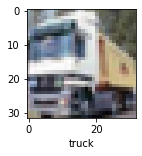

In [11]:
plot_sample(x_Train, y_Train, 1)

Text(0.5, 1.0, 'Class distribution in training set')

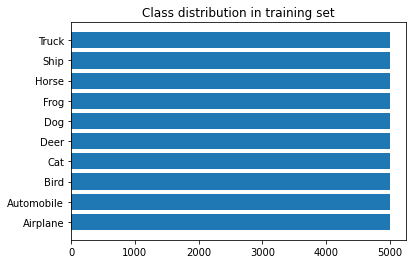

In [12]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_Train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

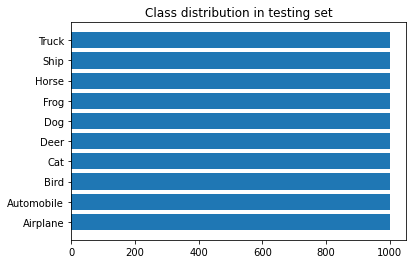

In [13]:
classes, counts = np.unique(y_Test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

In [14]:
# Scale the data
x_Train = x_Train / 255.0
x_Test = x_Test / 255.0

In [15]:
# Transform target variable into one-hotencoding
y_cat_Train = to_categorical(y_Train, 10)
y_cat_Test = to_categorical(y_Test, 10)

In [16]:
y_cat_Train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_Train, y_Train, epochs=5)

2022-07-24 03:42:05.673952: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-24 03:42:07.151939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.8157 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6275 - accuracy: 0.4238
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5430 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4819 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4342 - accuracy: 0.4957


In [18]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:

cnn.fit(x_Train, y_Train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4620 - accuracy: 0.4726
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0926 - accuracy: 0.6156
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9639 - accuracy: 0.6639
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8774 - accuracy: 0.6975
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8117 - accuracy: 0.7185
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.7556 - accuracy: 0.7369
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7064 - accuracy: 0.7550
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6649 - accuracy: 0.7679
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6242 - accuracy: 0.7820
Epoch 10/10
1563/1563 [==============================] - 21s 14m

In [21]:
cnn.evaluate(x_Test,y_Test)

313/313 [==============================] - 3s 7ms/step - loss: 0.9317 - accuracy: 0.6984


[0.9317351579666138, 0.6984000205993652]

In [22]:
y_pred = cnn.predict(x_Test)
y_pred[:5]

array([[7.1605272e-04, 1.0391019e-04, 5.3361645e-03, 9.2851740e-01,
        2.3971922e-03, 1.4295626e-02, 4.2730343e-02, 2.2650188e-06,
        5.8862115e-03, 1.4862129e-05],
       [3.1535063e-05, 9.7853559e-01, 6.1895287e-07, 6.9830000e-09,
        6.9587953e-11, 8.1278533e-11, 3.6978188e-11, 1.6251670e-08,
        2.1385659e-02, 4.6573638e-05],
       [9.2626244e-02, 5.3950363e-01, 5.0051175e-03, 2.5711793e-03,
        2.6169562e-04, 3.8831314e-04, 4.1477144e-04, 4.5420625e-03,
        3.4130213e-01, 1.3384802e-02],
       [9.0150106e-01, 4.8942529e-03, 5.2962609e-02, 1.3540930e-04,
        6.9039510e-05, 2.7192300e-06, 8.6041513e-07, 4.3708467e-05,
        4.0353760e-02, 3.6629768e-05],
       [4.3707144e-07, 1.5396005e-05, 8.1426576e-03, 3.6307801e-02,
        1.2506042e-02, 2.0048758e-03, 9.4101650e-01, 1.1545401e-07,
        5.6777994e-06, 4.4128737e-07]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [24]:
y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

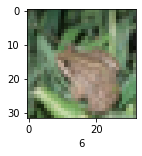

In [25]:
plot_sample(x_Test, y_Test,4)

In [26]:
classes[y_classes[4]]

6